In [62]:
#I will utilize some code from my past web scraping project and tweak it for this project.
#I will use selenium since that is what I have used in the past and is what I am familiar with

#This currently looks up certain fields for you and enters them into the website. 
#Next would be to automate this to run through all 4 designations I want. Do that at end. Also make cleaner later.
import requests
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re
import pandas as pd
from tabulate import tabulate
import os
import math
import regex as re 
from selenium.webdriver.support.ui import Select

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from decimal import Decimal
import numpy as np
import pandas as pd
import math

from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.metrics import r2_score

In [14]:
#This segment of code scrapes prices for all iPhone models from bankmycell. Note you do need the chrome
#driver in the folder where this code is so that is can run.

driver = webdriver.Chrome()
driver.get('https://www.bankmycell.com/sell/iphones');

#initialize my array
df = pd.DataFrame(columns=['model','price'])

#get the top selling price for each base model iphone
for i in range (1,25):
    model = driver.find_element(by=By.XPATH, value="/html/body/div[6]/div/div[3]/div/ul/li[" + str(i) + "]/div/div[2]/a").text
    viewOffer = driver.find_element(by=By.XPATH, value="/html/body/div[6]/div/div[3]/div/ul/li[" + str(i) + "]/div/div[3]/a/span")
    viewOffer.click()
    
    time.sleep(1)
    
    price = driver.find_element(by=By.XPATH, value="/html/body/div[8]/div/div[2]/div[3]/div[1]/div/div[2]/div[1]/div/div/ul/li[2]").text
    Append = {'model': model,'price': price}
    df = df.append(Append, ignore_index=True)
    
    driver.back()
    time.sleep(1)

In [16]:
#I output my scraped prices to this excel file.
df.to_csv('iPhone_prices.csv', index=False)

In [39]:
#Now let us conduct our depreciation analysis using the excel file we have outputted

df1 = pd.read_csv('iPhone_prices.csv', index_col = 'model')

#I created another excel file where I hardcoded the MSRP for each iPhone model
#I think added those MSRP values to my current dataframe.


df2 = pd.read_csv('iPhone_MSRP.csv', index_col = 'model')

#Now we need to combine both dataframes
df = pd.concat([df1,df2],axis=1)

#Remove dollar signs on Price and MSRP
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype('float')

df['msrp'] = df['msrp'].str.replace('$', '').str.replace(',', '').astype('float')
df['date'] = pd.to_datetime(date.today())
df['release_date'] = pd.to_datetime(df['release_date'])
df

C:\Users\gadde\AppData\Local\Temp/ipykernel_16544/3741366975.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype('float')
C:\Users\gadde\AppData\Local\Temp/ipykernel_16544/3741366975.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['msrp'] = df['msrp'].str.replace('$', '').str.replace(',', '').astype('float')


,price,msrp,release_date,date
model,,,,
iPhone SE 3 (2022),195.42,429.0,2022-03-18,2022-04-09
iPhone 13,565.00,799.0,2021-09-14,2022-04-09
iPhone 13 Mini,427.00,699.0,2021-09-14,2022-04-09
iPhone 13 Pro,690.00,999.0,2021-09-14,2022-04-09
iPhone 13 Pro Max,796.00,1099.0,2021-09-14,2022-04-09
iPhone 12,410.00,799.0,2020-10-23,2022-04-09
iPhone 12 Mini,325.00,699.0,2020-11-13,2022-04-09
iPhone 12 Pro,580.00,999.0,2020-10-23,2022-04-09
iPhone 12 Pro Max,671.00,1099.0,2020-11-13,2022-04-09


In [40]:
#Now we will assume linear depreciation and apply that methodology

df['percent_deprec'] = (df['msrp'] - df['price']) / df['msrp']
df['abs_deprec'] = df['msrp'] - df['price']
df['months_released'] = ((df['date'] - df['release_date'])/np.timedelta64(1, 'M'))
df['monthly_per_deprec'] = df['percent_deprec'] / df['months_released']
df['monthly_abs_deprec'] = df['abs_deprec'] / df['months_released']

In [41]:
#output to excel file for tabelau to use
df.to_csv('iPhone_visualization_output.csv', index=True)

In [43]:
#remove iphone se 2022 since it is an outlier since it was released too recently
df_mod = df.drop(df[df.index == 'iPhone SE 3 (2022)'].index)

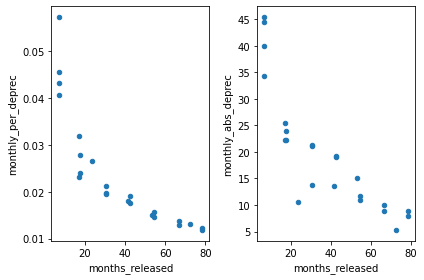

In [45]:
#Looking at Tableau, it looks like the depreciation follows an exponential curve. So fit an exponential curve
#So you can make a rough estimation how much you monthly iPhone depreciation will drop if kept longer

#Plot to show longer you hold onto an iphone, the lower monthly relative and abs. depreciation. No need for a legend here
fig, axes = plt.subplots(nrows=1, ncols=2)
df_mod.plot(x ='months_released', y='monthly_per_deprec', kind = 'scatter',ax=axes[0])
df_mod.plot(x ='months_released', y='monthly_abs_deprec', kind = 'scatter',ax=axes[1])
plt.tight_layout()




R2: 0.772241381747323


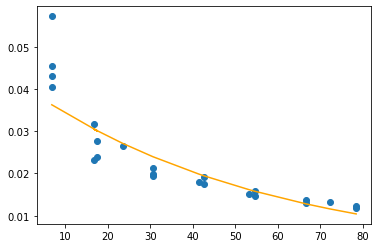

In [68]:
#Note our assumption was that percent depreciation is the same as a function of time for different iPhone models
#So we want to look percent depreciation here, not absolute depreciation
x_data = df_mod['months_released']
y_data = df_mod['monthly_per_deprec']
log_y_data = np.log(y_data)
curve_fit = np.polyfit(x_data, log_y_data, 1)
#print(curve_fit)

y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*x_data)


# Blue 
plt.scatter(x_data, y_data)
  
# best fit in orange
plt.plot(x_data, y, color='orange')

print('R2: '+str(r2_score(y_data, y)))